In [2]:
import pandas as pd
# 엑셀 파일 불러오기
excel_path1 = '/Users/kyuree/Desktop/pds_capstone1/dataset/점멸신호운영현황_원본.xlsx'
xls1 = pd.ExcelFile(excel_path1)

# 각 시트를 데이터프레임으로 읽어와 리스트에 저장
always_sign = pd.read_excel(xls1, sheet_name='Table 1',header=1)
time_sign = pd.read_excel(xls1, sheet_name='Table 2',header=0)

print(always_sign)
print(time_sign)

      연번    교번 시스템  경찰서         교차로명   연동 기하\n구조
0      1   162  표준   광진    중곡119안전센터   메인      단
1      2   233  표준   중랑        중화지구대   메인      단
2      3   336  표준  서대문   북아현119안전센터   메인      단
3      4   469  표준  서대문  e편한세상신촌305동   메인      3
4      5   764  표준   종로         감사원앞   메인      3
..   ...   ...  ..  ...          ...  ...    ...
112  113  4935  표준   강서       마곡필네이쳐  NaN      3
113  114  4938  표준   강서        수명산마트  NaN      4
114  115  4939  표준   강서      명덕외고기숙사  NaN      4
115  116  4939  표준   강서      명덕외고기숙사  서측1      3
116  117  4209  표준   동작       강남초교정문  NaN      단

[117 rows x 7 columns]
        연번    교번 시스템 경찰서         교차로명   연동 기하\n구조         점멸시간  \
0        1     4  표준  종암         월곡초교   메인      단  00:00~04:00   
1        2     8  표준  종암         사대부중   메인      3  00:00~04:00   
2        3    92  표준  광진        광장중학교   메인      단  20:00~07:00   
3        4   136  표준  성북        아리랑고개   동측      3  00:00~05:00   
4        5   182  표준  강북         예찬교회   메인      3  01:00~0

##### 할 전처리
###### 1. 항시 점멸신호 -> 경찰서로 구분돼있는데 이를 자치구 명으로 바꾸어줌
###### 2. 엑셀로 변환과정에서 생긴 글자 인식 오류 -> 올바른 글자로 수정
###### 3. 운영시간 형식 수정 및 통일
###### 3-1. 평일 운영, 주말 운영 등 특징은 따로 컬럼으로 나타내주기
###### 4. 교차로별 경위도 값 추가
###### 5. 자치구별 운영 점멸신호 개수 파악


In [3]:
#1번 전처리
always_sign['경찰서'].unique()

array(['광진', '중랑', '서대문', '종로', '노원', '성동', '도봉', '종암', '성북', '용산', '은평',
       '혜화', '마포', '강북', '서부', '강서', '수서', '구로', '송파', '서초', '관악', '방배',
       '강동', '동작', '영등포'], dtype=object)

###### 대체할 값 정리
강서구 - 강서
강남구 - 수서
도봉구 - 도봉
송파구 - 송파
서대문구 - 서대문
종로구 - 종로,혜화
성동구 - 성동
동작구 - 동작
용산구 - 용산
중랑구 - 중랑
노원구 - 노우너
강동구 - 강동 , 갈동
구로구 - 구로
광진구 - 광진
영등포구 - 영등포
성북구 - 종암, 성북
서초구 - 방배, 서초
마포구 - 마포
은평구 - 서부, 은평
강북구 - 강북
관악구 - 관악
양천구 - 양천
동대문구 - 동대문
중구 - 남대문, 중부
금천구 - 금천

In [4]:
#항시 점멸 - 값 대체, 새로운 컬럼 생성
for i in range(len(always_sign)):
    if always_sign.loc[i,'경찰서'] =='혜화':
        always_sign.loc[i,'자치구명'] = '종로구'
    elif always_sign.loc[i,'경찰서'] =='수서':
        always_sign.loc[i,'자치구명'] = '강남구'
    elif always_sign.loc[i,'경찰서'] =='종암':
        always_sign.loc[i,'자치구명'] = '성북구'
    elif always_sign.loc[i,'경찰서'] =='방배':
        always_sign.loc[i,'자치구명'] = '서초구'
    elif always_sign.loc[i,'경찰서'] =='서부':
        always_sign.loc[i,'자치구명'] = '은평구'
    else:
        always_sign.loc[i,'자치구명'] = always_sign.loc[i,'경찰서']+'구'
always_sign

#시간제 점멸- 값 대체, 새로운 컬럼 생성
time_sign['경찰서'].unique()

for i in range(len(time_sign)):
    if time_sign.loc[i,'경찰서'] =='혜화':
        time_sign.loc[i,'자치구명'] = '종로구'
    elif time_sign.loc[i,'경찰서'] =='수서':
        time_sign.loc[i,'자치구명'] = '강남구'
    elif time_sign.loc[i,'경찰서'] =='종암':
        time_sign.loc[i,'자치구명'] = '성북구'
    elif time_sign.loc[i,'경찰서'] =='방배':
        time_sign.loc[i,'자치구명'] = '서초구'
    elif time_sign.loc[i,'경찰서'] =='서부':
        time_sign.loc[i,'자치구명'] = '은평구'
    elif time_sign.loc[i,'경찰서'] =='금천':
        time_sign.loc[i,'자치구명'] = '금천구'
    elif time_sign.loc[i,'경찰서'] =='갈동':
        time_sign.loc[i,'자치구명'] = '강동구'
    elif time_sign.loc[i,'경찰서'] =='남대문':
        time_sign.loc[i,'자치구명'] = '중구'
    elif time_sign.loc[i,'경찰서'] =='중부':
        time_sign.loc[i,'자치구명'] = '중구'
    elif time_sign.loc[i,'경찰서'] =='동대문':
        time_sign.loc[i,'자치구명'] = '동대문구'
    elif time_sign.loc[i,'경찰서'] =='양천':
        time_sign.loc[i,'자치구명'] = '양천구'
    else:
        time_sign.loc[i,'자치구명'] = time_sign.loc[i,'경찰서']+'구'
time_sign

,연번,교번,시스템,경찰서,교차로명,연동,기하\n구조,점멸시간,비고(날짜),자치구명
0,1,4,표준,종암,월곡초교,메인,단,00:00~04:00,2026-03-18 00:00:00,성북구
1,2,8,표준,종암,사대부중,메인,3,00:00~04:00,2026-03-18 00:00:00,성북구
2,3,92,표준,광진,광장중학교,메인,단,20:00~07:00,2017-12-10 00:00:00,광진구
3,4,136,표준,성북,아리랑고개,동측,3,00:00~05:00,2013-04-09 00:00:00,성북구
4,5,182,표준,강북,예찬교회,메인,3,01:00~05:00,2017-11-09 00:00:00,강북구
...,...,...,...,...,...,...,...,...,...,...
1025,1026,4940,표준,강서,명덕외고정문,NaN,4,01:00~05:00,2004-03-19 00:00:00,강서구
1026,1027,4973,표준,수서,MS빌딩,NaN,단,01:00~05:00,2021-09-07 00:00:00,강남구
1027,1028,4983,표준,동작,구립양지어린이집앞,NaN,4,00:00~04:00,2018-08-22 00:00:00,동작구
1028,1029,4984,표준,서초,네이처힐501동앞,NaN,4,00:00~05:00,2022-10-19 00:00:00,서초구


##### 2번 전처리
###### 엑셀로 변환과정에서 생긴 글자 인식 오류 -> 올바른 글자로 수정(오류가 별로 없다 나중에)

##### 3. 운영시간 형식 수정 및 통일
###### 3-1. 평일 운영, 주말 운영 등 특징은 따로 컬럼으로 나타내주기

In [5]:
#과정 복잡한 거 고려해서 새롭게 데이터 프레임 생성
time_sign_t = time_sign[['연번','점멸시간']]
time_sign_t['점멸시간'].unique()

array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30\n09:00~12:00', '23:00~05:00', '22:00~05:00',
       '18:00~07:00\n주말 항시점멸', '00:00~05:00(매일)\n11:30~14:00(매일)',
       '00:00~05:00(매일)\n11:00~17:00(월~토)', '00:00~05:00\n토,일 항시점멸',
       '평일 17:30~07:00\n(주말 : 항시점멸)',
       '토요일 14:00~00:00\n일요일 00:00~22:00 공휴일 10:00~22:00', '20:00~08:00',
       '평일 : 19:00~07:00\n주말 : 항시점멸', '평일 : 17:00~07:00\n주말 : 항시점멸',
       '18:00~06:00', '08:00~09:00', '20:00~05:00', '09:30~06:00',
       '21:00~06:00', '00:00~05:00\n(주말)00:00~07:00', '17:00~19:00',
       '00:00~06:00', '17:00~06:00', '20:00~07:00\n주말 전일점멸',
       '23:00~06:00', '평일 17:00~익일07:00\n주말 전일점멸', '19:00~07:00',
       '09:00~08:00', '22:00~07:30', '09:00~익일08:00',
       '평일: 21:00~08:00\n그외 전일점멸', '07:30~17:00\n일요일, 특수일 전일점멸'],
      dtype=object)

컬럼을 다음과 같이 구분
1. 매일1, 매일2 -> 하루 중 운영시간대가 두 종류임을 고려
- 하루 중 운영시간대가 한 종류인 건 매일2 컬럼 값을 0으로 둔다
2. 토요일 -> 주말에 특수하게 운영하는 것 고려
3. 일요일 -> 주말에 특수하게 운영하는 것 고려
4. 그외 -> 특수일 전일점멸  => '00:00~24:00'값 넣음
- 주말 둘다 운영하는 건 같은 값 넣음
- 평일엔 ~ 주말은 항시점멸 -> 항시점멸 값은 '00:00~24:00' 값 넣음
- 컬럼에 해당하는 값이 없는 케이스는 0으로 둔다

In [6]:
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('익일', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('항시', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('전일', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace(' ', '') # 띄어쓰기 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('(', '') # ( 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace(')', '') # ) 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('매일', '') # ( 제거
time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('평일', '') # ) 제거

time_sign_t['점멸시간'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/3877715729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('익일', '') # ) 제거
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/3877715729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t['점멸시간'] = time_sign_t['점멸시간'].str.replace('항시', '') # ) 제거
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/3877715729.py:3: SettingWithCopyWarning: 
A value

array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30\n09:00~12:00', '23:00~05:00', '22:00~05:00',
       '18:00~07:00\n주말점멸', '00:00~05:00\n11:30~14:00',
       '00:00~05:00\n11:00~17:00월~토', '00:00~05:00\n토,일점멸',
       '17:30~07:00\n주말:점멸',
       '토요일14:00~00:00\n일요일00:00~22:00공휴일10:00~22:00', '20:00~08:00',
       ':19:00~07:00\n주말:점멸', ':17:00~07:00\n주말:점멸', '18:00~06:00',
       '08:00~09:00', '20:00~05:00', '09:30~06:00', '21:00~06:00',
       '00:00~05:00\n주말00:00~07:00', '17:00~19:00', '00:00~06:00',
       '17:00~06:00', '20:00~07:00\n주말점멸', '23:00~06:00',
       '17:00~07:00\n주말점멸', '19:00~07:00', '09:00~08:00', '22:00~07:30',
       ':21:00~08:00\n그외점멸', '07:30~17:00\n일요일,특수일점멸'], dtype=object)

In [7]:
#우선 별다른 특이사항 없는 값은 그대로 넣어줌
for i in range(len(time_sign_t)):
    if len(time_sign_t.loc[i,'점멸시간'])==11:
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간']
        time_sign_t.loc[i,'매일2'] = 0
    
time_sign_t['매일1'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/2553705349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간']
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/2553705349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'매일2'] = 0


array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00', nan,
       '23:00~05:00', '22:00~05:00', '20:00~08:00', '18:00~06:00',
       '08:00~09:00', '20:00~05:00', '09:30~06:00', '21:00~06:00',
       '17:00~19:00', '00:00~06:00', '17:00~06:00', '23:00~06:00',
       '19:00~07:00', '09:00~08:00', '22:00~07:30'], dtype=object)

In [8]:
#평일에 운영하는 시간대가 두번인 경우
for i in range(len(time_sign)):
    if time_sign_t.loc[i,'점멸시간']=='15:00~07:30\n09:00~12:00':
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
        time_sign_t.loc[i,'매일2'] = time_sign_t.loc[i,'점멸시간'][12:]
    elif time_sign_t.loc[i,'점멸시간']== '00:00~05:00\n11:30~14:00':
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
        time_sign_t.loc[i,'매일2'] = time_sign_t.loc[i,'점멸시간'][12:]
    else:
        pass
time_sign_t['매일2'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/1400543745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'매일2'] = time_sign_t.loc[i,'점멸시간'][12:]


array([0.0, '09:00~12:00', nan, '11:30~14:00'], dtype=object)

##### 평일 ~ 주말엔 항시 점멸 경우

- '18:00~07:00\n주말점멸'**
- '00:00~05:00\n토,일점멸'**
- '17:30~07:00\n주말:점멸'**
- ':19:00~07:00\n주말:점멸',** 
- ':17:00~07:00\n주말:점멸'**
- '20:00~07:00\n주말점멸'**
- '17:00~07:00\n주말점멸'**
- ':21:00~08:00\n그외점멸'**

In [9]:
#평일 ~ 주말엔 항시 점멸 경우
for i in range(len(time_sign_t)):
    if '주말' in time_sign_t.loc[i,'점멸시간'] and '점멸' in time_sign_t.loc[i,'점멸시간']:
        if time_sign_t.loc[i,'점멸시간'][0]!=':' :
            time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
            time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
            time_sign_t.loc[i,'일요일'] = '00:00~24:00'
        else:
            time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][1:12]
            time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
            time_sign_t.loc[i,'일요일'] = '00:00~24:00'
time_sign_t['매일1'].unique()

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/2872740477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/2872740477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[i,'일요일'] = '00:00~24:00'


array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30', '23:00~05:00', '22:00~05:00', '18:00~07:00', nan,
       '17:30~07:00', '20:00~08:00', '19:00~07:00', '17:00~07:00',
       '18:00~06:00', '08:00~09:00', '20:00~05:00', '09:30~06:00',
       '21:00~06:00', '17:00~19:00', '00:00~06:00', '17:00~06:00',
       '23:00~06:00', '09:00~08:00', '22:00~07:30'], dtype=object)

In [10]:
#'00:00~05:00\n토,일점멸'
#':21:00~08:00\n그외점멸'
for i in range(len(time_sign_t)):
    if time_sign_t.loc[i,'점멸시간']=='00:00~05:00\n토,일점멸' :
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][:11]
        time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
        time_sign_t.loc[i,'일요일'] = '00:00~24:00'
    elif time_sign_t.loc[i,'점멸시간']==':21:00~08:00\n그외점멸' :
        time_sign_t.loc[i,'매일1'] = time_sign_t.loc[i,'점멸시간'][1:12]
        time_sign_t.loc[i,'토요일1'] = '00:00~24:00'
        time_sign_t.loc[i,'일요일'] = '00:00~24:00'
    else:
        pass
time_sign_t['매일1'].unique()

array(['00:00~04:00', '20:00~07:00', '00:00~05:00', '01:00~05:00',
       '01:00~04:00', '21:00~07:00', '00:00~24:00', '20:00~06:00',
       '15:00~07:30', '23:00~05:00', '22:00~05:00', '18:00~07:00', nan,
       '17:30~07:00', '20:00~08:00', '19:00~07:00', '17:00~07:00',
       '18:00~06:00', '08:00~09:00', '20:00~05:00', '09:30~06:00',
       '21:00~06:00', '17:00~19:00', '00:00~06:00', '17:00~06:00',
       '23:00~06:00', '09:00~08:00', '22:00~07:30', '21:00~08:00'],
      dtype=object)

In [11]:
#남은 전처리 값 확인
# 어떤 컬럼에도 값이 없는 행 확인
time_sign_t[time_sign_t[['매일1', '토요일1', '일요일']].isnull().all(axis=1)]

,연번,점멸시간,매일1,매일2,토요일1,일요일
403,404,00:00~05:00\n11:00~17:00월~토,NaN,NaN,NaN,NaN
483,484,토요일14:00~00:00\n일요일00:00~22:00공휴일10:00~22:00,NaN,NaN,NaN,NaN
624,625,00:00~05:00\n주말00:00~07:00,NaN,NaN,NaN,NaN
625,626,00:00~05:00\n주말00:00~07:00,NaN,NaN,NaN,NaN
1013,1014,"07:30~17:00\n일요일,특수일점멸",NaN,NaN,NaN,NaN


In [12]:
time_sign_t.loc[403,'매일1'],time_sign_t.loc[403,'매일2'],time_sign_t.loc[403,'토요일1'],time_sign_t.loc[403,'토요일2'] = time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23],time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23]
time_sign_t.loc[483,'토요일1'],time_sign_t.loc[483,'일요일'],time_sign_t.loc[483,'특이사항'] = time_sign_t.loc[483,'점멸시간'][3:14],time_sign_t.loc[483,'점멸시간'][18:29],time_sign_t.loc[483,'점멸시간'][29:]
time_sign_t.loc[624,'매일1'],time_sign_t.loc[624,'토요일1'],time_sign_t.loc[624,'일요일'] =time_sign_t.loc[624,'점멸시간'][:11],time_sign_t.loc[624,'점멸시간'][14:],time_sign_t.loc[624,'점멸시간'][14:]
time_sign_t.loc[625,'매일1'],time_sign_t.loc[625,'토요일1'],time_sign_t.loc[625,'일요일'] =time_sign_t.loc[625,'점멸시간'][:11],time_sign_t.loc[625,'점멸시간'][14:],time_sign_t.loc[625,'점멸시간'][14:]
time_sign_t.loc[1013,'매일1'],time_sign_t.loc[1013,'일요일'],time_sign_t.loc[1013,'특이사항']=time_sign_t.loc[1013,'점멸시간'][:11],'00:00~24:00',time_sign_t.loc[1013,'점멸시간'][-5:]

/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/3552771388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sign_t.loc[403,'매일1'],time_sign_t.loc[403,'매일2'],time_sign_t.loc[403,'토요일1'],time_sign_t.loc[403,'토요일2'] = time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23],time_sign_t.loc[403,'점멸시간'][:11],time_sign_t.loc[403,'점멸시간'][12:23]
/var/folders/h1/h4f94pq94896vqyqb5grfg2c0000gn/T/ipykernel_78414/3552771388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sig

In [13]:
print(time_sign_t['매일1'].unique())
print(time_sign_t['매일2'].unique())
print(time_sign_t['토요일1'].unique())
print(time_sign_t['토요일2'].unique())
print(time_sign_t['일요일'].unique())
print(time_sign_t['특이사항'].unique())

['00:00~04:00' '20:00~07:00' '00:00~05:00' '01:00~05:00' '01:00~04:00'
 '21:00~07:00' '00:00~24:00' '20:00~06:00' '15:00~07:30' '23:00~05:00'
 '22:00~05:00' '18:00~07:00' '17:30~07:00' nan '20:00~08:00' '19:00~07:00'
 '17:00~07:00' '18:00~06:00' '08:00~09:00' '20:00~05:00' '09:30~06:00'
 '21:00~06:00' '17:00~19:00' '00:00~06:00' '17:00~06:00' '23:00~06:00'
 '09:00~08:00' '22:00~07:30' '21:00~08:00' '07:30~17:00']
[0.0 '09:00~12:00' nan '11:30~14:00' '11:00~17:00']
[nan '00:00~24:00' '00:00~05:00' '14:00~00:00' '00:00~07:00']
[nan '11:00~17:00']
[nan '00:00~24:00' '00:00~22:00' '00:00~07:00']
[nan '공휴일10:00~22:00' '특수일점멸']


In [14]:
#최종적으로 널값에 0부여
time_sign_t = time_sign_t.fillna(0)
print(time_sign_t['매일1'].unique())
print(time_sign_t['매일2'].unique())
print(time_sign_t['토요일1'].unique())
print(time_sign_t['토요일2'].unique())
print(time_sign_t['일요일'].unique())
print(time_sign_t['특이사항'].unique())

['00:00~04:00' '20:00~07:00' '00:00~05:00' '01:00~05:00' '01:00~04:00'
 '21:00~07:00' '00:00~24:00' '20:00~06:00' '15:00~07:30' '23:00~05:00'
 '22:00~05:00' '18:00~07:00' '17:30~07:00' 0 '20:00~08:00' '19:00~07:00'
 '17:00~07:00' '18:00~06:00' '08:00~09:00' '20:00~05:00' '09:30~06:00'
 '21:00~06:00' '17:00~19:00' '00:00~06:00' '17:00~06:00' '23:00~06:00'
 '09:00~08:00' '22:00~07:30' '21:00~08:00' '07:30~17:00']
[0.0 '09:00~12:00' '11:30~14:00' '11:00~17:00']
[0 '00:00~24:00' '00:00~05:00' '14:00~00:00' '00:00~07:00']
[0 '11:00~17:00']
[0 '00:00~24:00' '00:00~22:00' '00:00~07:00']
[0 '공휴일10:00~22:00' '특수일점멸']


In [15]:
#예시로 한 행 값 확인
res_time_sign = pd.concat([time_sign[['교차로명','자치구명']],time_sign_t[['매일1','매일2','토요일1','토요일2','일요일','특이사항']]],axis=1)
res_time_sign.iloc[624]

교차로명     관악드림타운107동
자치구명            관악구
매일1     00:00~05:00
매일2               0
토요일1    00:00~07:00
토요일2              0
일요일     00:00~07:00
특이사항              0
Name: 624, dtype: object

In [33]:
res_time_sign['자치구명'].values

array(['성북구', '성북구', '광진구', ..., '동작구', '서초구', '구로구'], dtype=object)

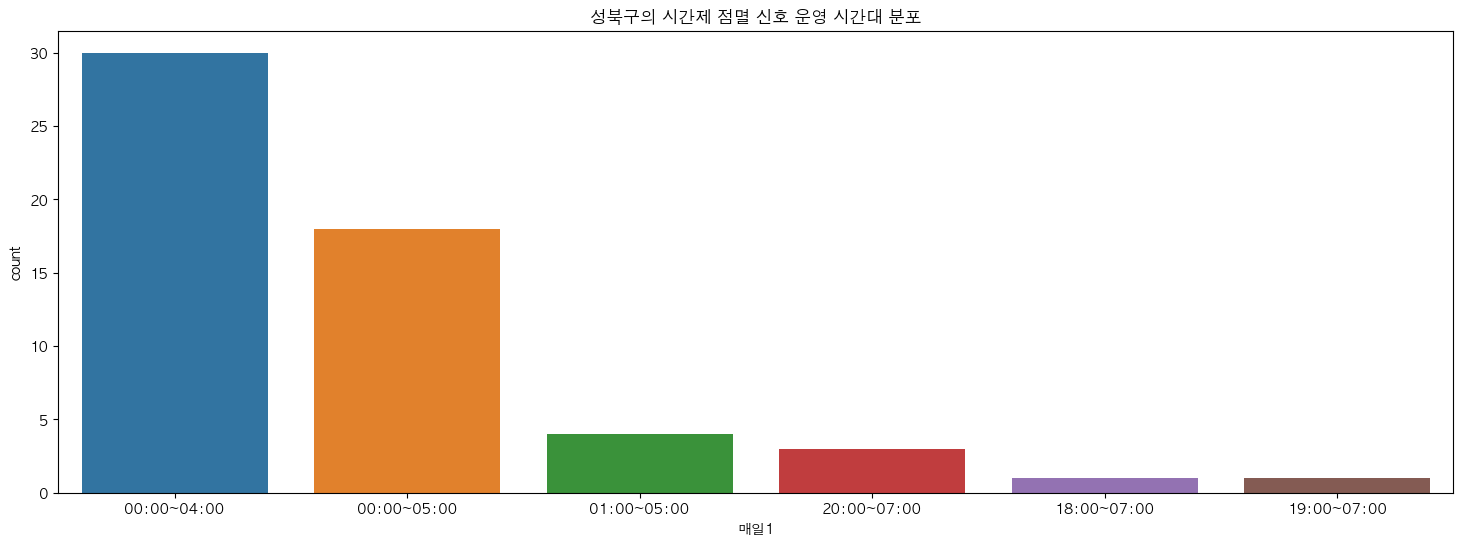

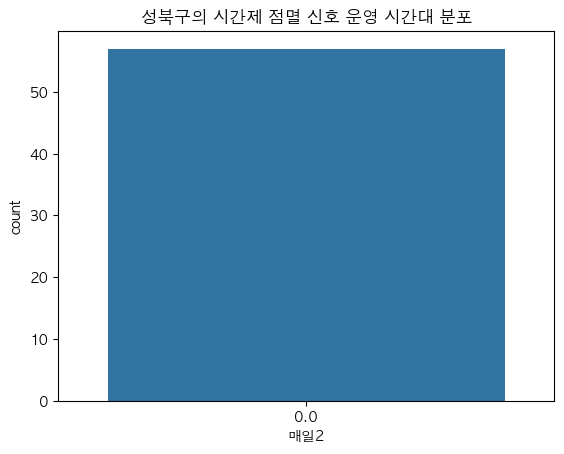

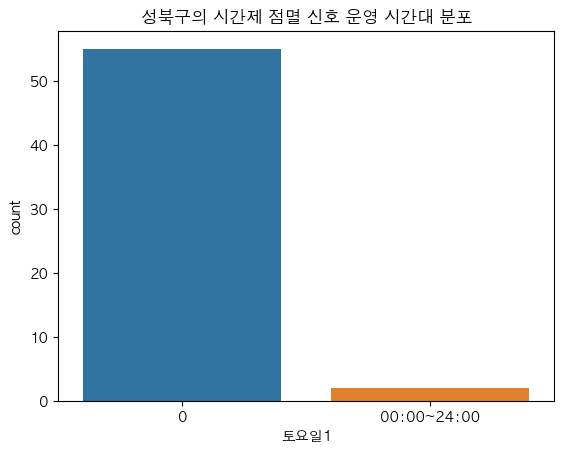

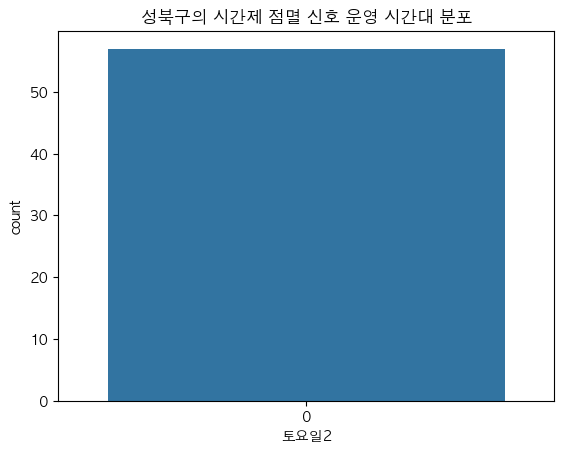

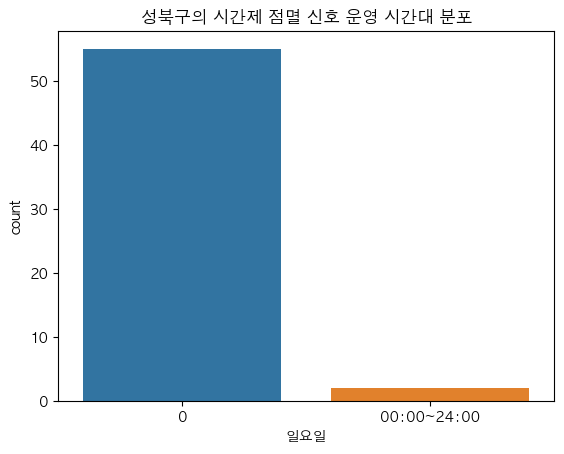

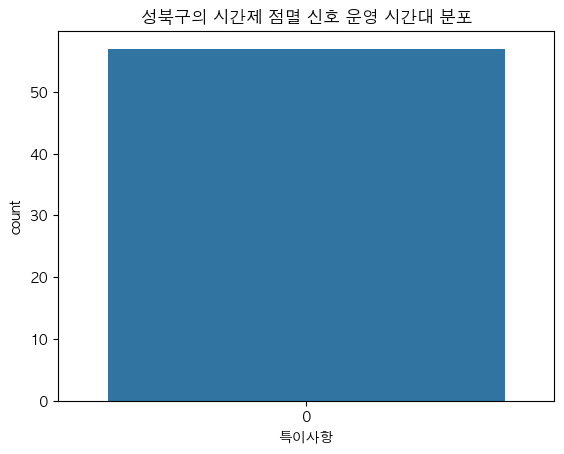

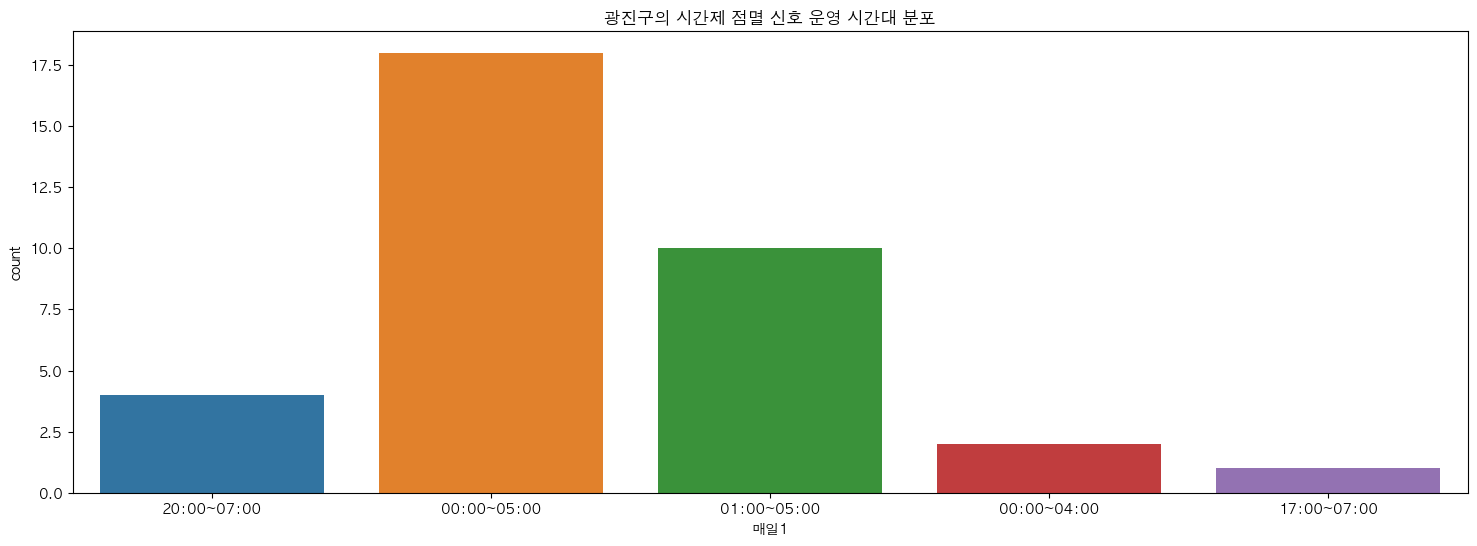

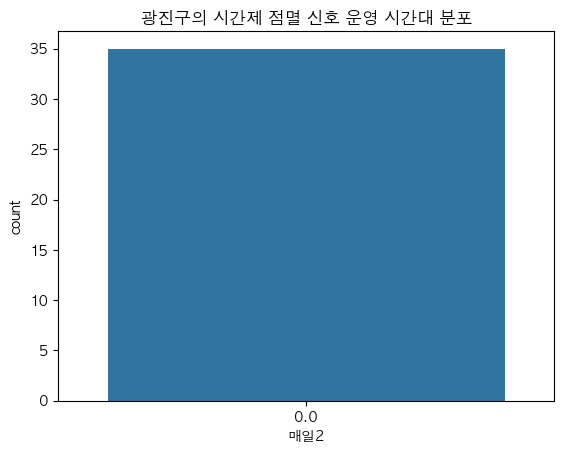

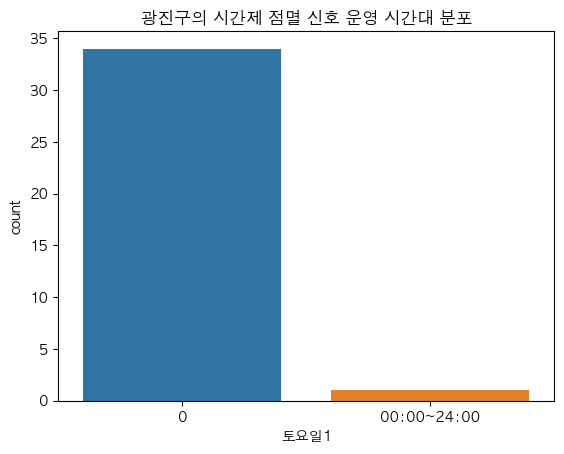

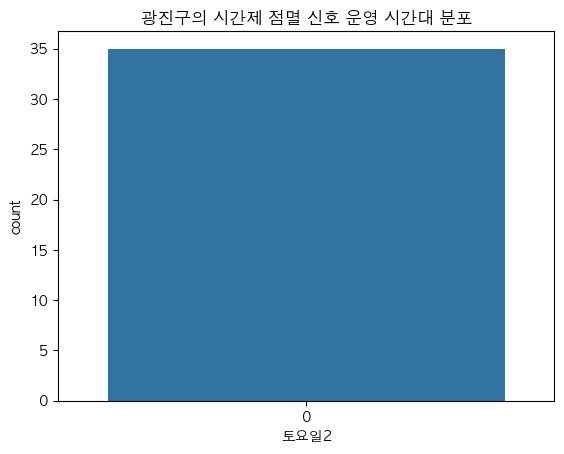

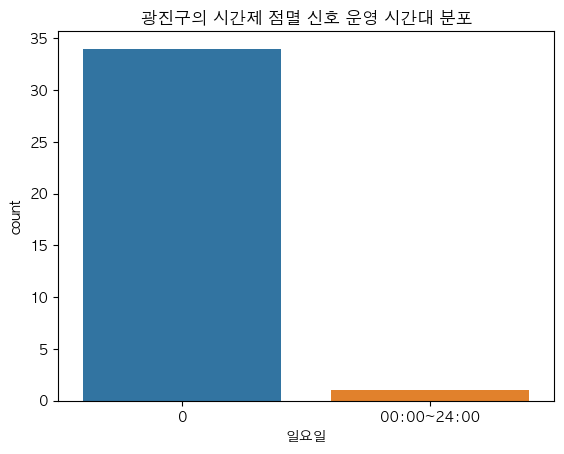

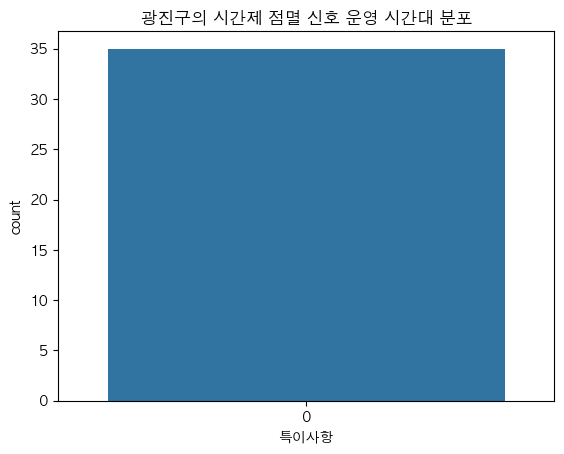

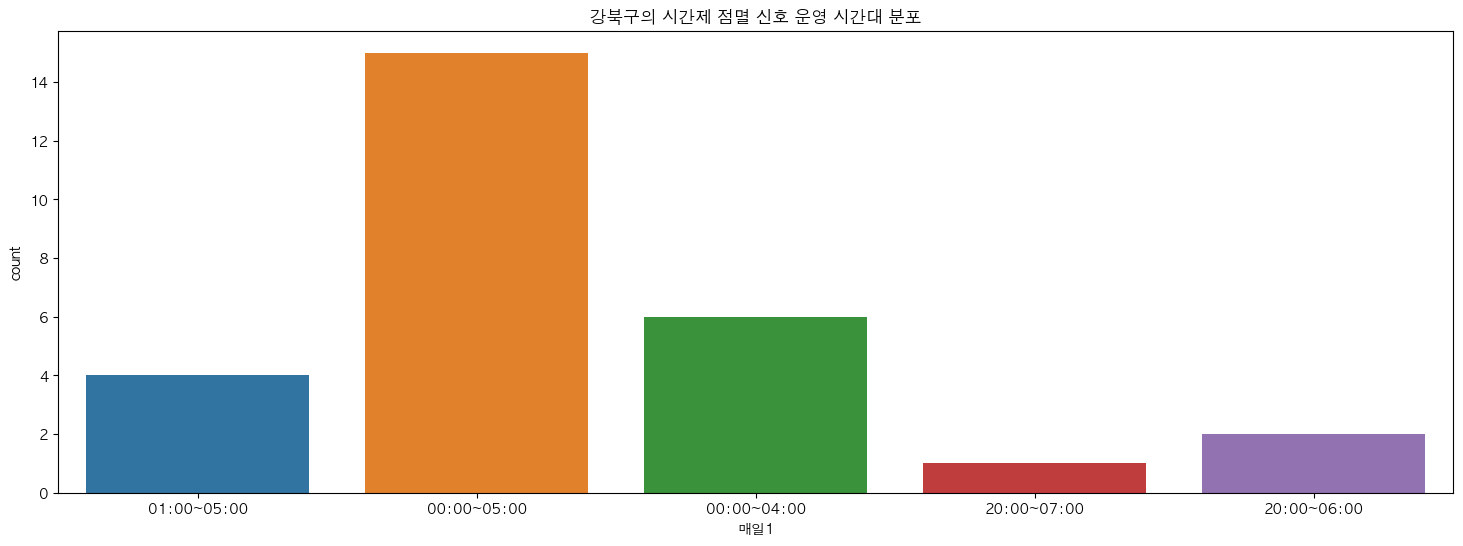

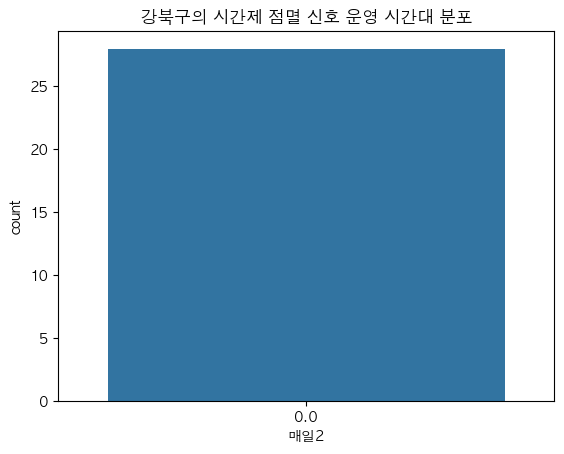

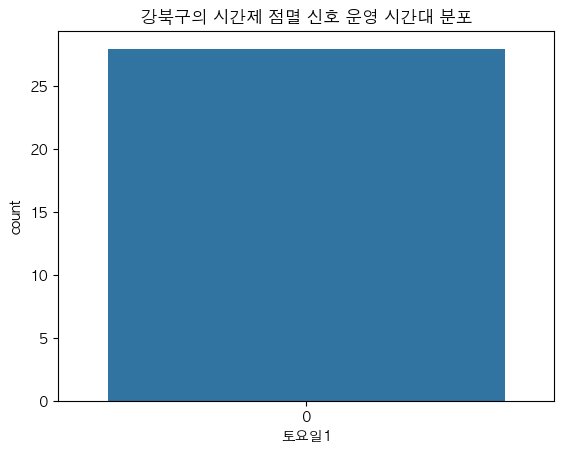

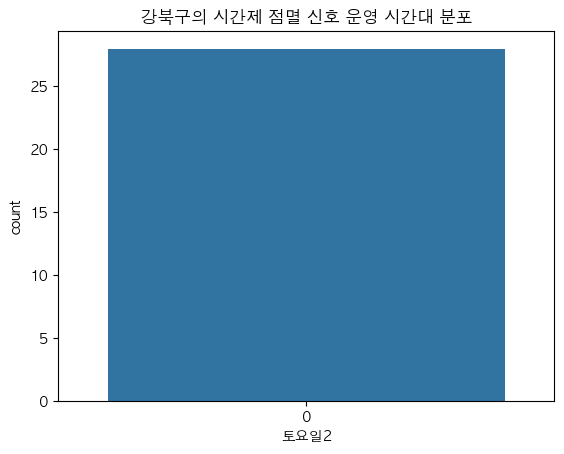

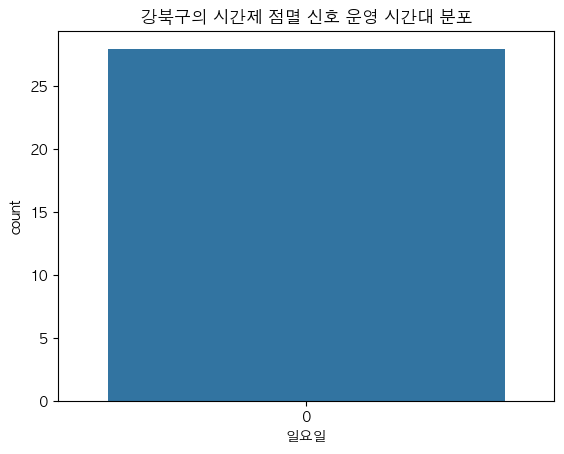

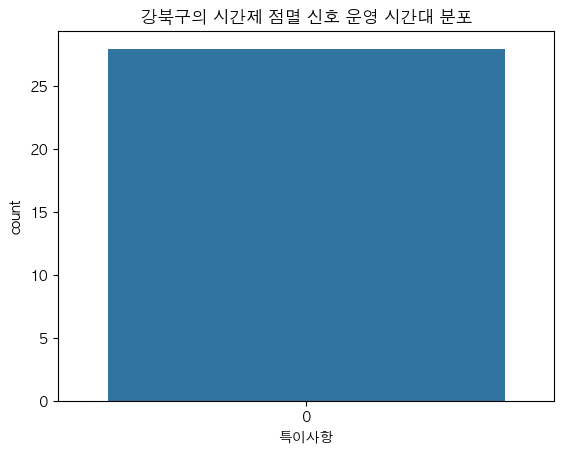

In [76]:
# 자치구별 시간제 점멸신호 운영 시간대 파악
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
plt.rcParams['font.size'] = 10


col = ['매일1','매일2','토요일1','토요일2','일요일','특이사항']
for i in res_time_sign['자치구명'].unique()[:3]:
    groupby_gu = res_time_sign[res_time_sign['자치구명']==i]
    # groupby_gu['매일2'] = groupby_gu['매일2'].astype(str)
    # fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plt.figure(figsize=(18,6))
    # ax = fig.gca()
    for s in col:
        plt.title('{0}의 시간제 점멸 신호 운영 시간대 분포'.format(i))
        sns.countplot(groupby_gu[s])
        plt.show()

    # plt.figure(figsize=(13,6))
    # plt.title('{0}의 시간제 점멸 신호 운영 시간대 분포'.format(i))
    # sns.countplot(groupby_gu['매일2'])
    # plt.show()
    


In [58]:
for i in res_time_sign['자치구명'].unique()[:4]:
    groupby_gu = res_time_sign[res_time_sign['자치구명']==i]
    print(groupby_gu)

          교차로명 자치구명          매일1  매일2         토요일1 토요일2          일요일 특이사항
0         월곡초교  성북구  00:00~04:00  0.0            0    0            0    0
1         사대부중  성북구  00:00~04:00  0.0            0    0            0    0
3        아리랑고개  성북구  00:00~05:00  0.0            0    0            0    0
27     삼양로9길입구  성북구  00:00~05:00  0.0            0    0            0    0
39        성신여대  성북구  00:00~05:00  0.0            0    0            0    0
40    정릉3동주민센터  성북구  00:00~04:00  0.0            0    0            0    0
41    정릉3동주민센터  성북구  00:00~04:00  0.0            0    0            0    0
42    정릉3동주민센터  성북구  00:00~04:00  0.0            0    0            0    0
60        숭곡초교  성북구  00:00~05:00  0.0            0    0            0    0
78     정릉대우아파트  성북구  00:00~04:00  0.0            0    0            0    0
79        성신초교  성북구  00:00~05:00  0.0            0    0            0    0
82      돈암천주교회  성북구  01:00~05:00  0.0            0    0            0    0
83      홍익중고입구  성북구  00:00~04:00  0.0 

##### 5. 자치구별 운영 점멸신호 개수 파악

In [17]:
#시간제 점멸 자치구별 개수 확인
time_sign['자치구명'].value_counts()
time_sign_cnt = pd.DataFrame(time_sign['자치구명'].value_counts().sort_index())
time_sign_cnt.columns=['운영개수']
time_sign_cnt

,운영개수
강남구,34
강동구,61
강북구,28
강서구,94
관악구,28
광진구,35
구로구,40
금천구,15
노원구,98
도봉구,43


In [18]:
#항시 점멸 신호기 자치구별 운영개수 확인
always_sign_cnt = pd.DataFrame(always_sign['자치구명'].value_counts())

always_sign_cnt.loc['금천구']=0
always_sign_cnt.loc['동대문구']=0
always_sign_cnt.loc['양천구']=0
always_sign_cnt.loc['중구']=0
always_sign_cnt.columns=['운영개수']
always_sign_cnt=always_sign_cnt.sort_index()

always_sign_cnt

,운영개수
강남구,10
강동구,5
강북구,1
강서구,17
관악구,1
광진구,4
구로구,5
금천구,0
노원구,5
도봉구,3


In [19]:
#최종 자치구별 점멸신호 운영개수 확인
result_df = pd.DataFrame({
    '모든 점멸신호 운영개수': always_sign_cnt['운영개수'] + time_sign_cnt['운영개수']
}).reset_index().rename(columns={'index':'자치구명'})

result_df

,자치구명,모든 점멸신호 운영개수
0,강남구,44
1,강동구,66
2,강북구,29
3,강서구,111
4,관악구,29
5,광진구,39
6,구로구,45
7,금천구,15
8,노원구,103
9,도봉구,46


In [20]:
# 데이터프레임을 CSV 파일로 저장
result_df.to_csv('kr_자치구별_점멸신호현황.csv', index=False)